# SHare

Terdiri dari : 
*   Library yang digunakan
*   List item
*   Pembersihan data menggunakan Sastrawi
*   Pembuatan Model
*   Cek Plot
*   Export model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [3]:
!pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Add CSV file and preprocessing data

In [4]:
data = pd.read_csv('/content/Dataset.csv')
data.head()

,text,pasal
0,"Pak A sering pegang pegang tangan, kadang pega...",1
1,lama lama dia tarik tanganku baru baring di pa...,1
2,pake jilbab syar'i dan gapernah sentuhan sama ...,0
3,"saya ditarik"" hampir masuk di ruangannya dosen...",1
4,saat mengajar dia mendekati teman saya dengan ...,1


Stem kata dan buang stopword yang dipake


In [5]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StemmerFactory()
stemmer_factory = factory.create_stemmer()
factory = StopWordRemoverFactory()
stopword_factory = factory.create_stop_word_remover()
def preprocessing(word):
    steaming = stemmer_factory.stem(word)
    finish = stopword_factory.remove(steaming)
    return finish

data.text = data.text.map(preprocessing)


bagi text dan label

In [6]:
x = data['text']
y = data['pasal']
len(x), len(y)

(85, 85)

## Menggunakan TF.Hub

Add TF HUB 
<url>https://tfhub.dev/google/nnlm-id-dim128/2</url>

In [7]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/nnlm-id-dim128/2")
hub_layer = hub.KerasLayer(embed, input_shape=[], 
                           dtype=tf.string, trainable=True)

In [8]:
x = np.array(x)
y = np.array(y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True)

In [10]:
model = tf.keras.Sequential([hub_layer,
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 128)               112461824 
                                                                 
 dense (Dense)               (None, 16)                2064      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 112,463,905
Trainable params: 112,463,905
Non-trainable params: 0
_________________________________________________________________


In [11]:
opt = tf.keras.optimizers.SGD(learning_rate = 0.01)

model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train,
                    epochs= 100,
                    steps_per_epoch = 5,
                    validation_data=(X_test, y_test),
                    )

Epoch 1/100
5/5 [==============================] - 4s 56ms/step - loss: 0.7346 - accuracy: 0.3559 - val_loss: 0.7262 - val_accuracy: 0.3077
Epoch 2/100
5/5 [==============================] - 0s 13ms/step - loss: 0.7031 - accuracy: 0.4576 - val_loss: 0.7227 - val_accuracy: 0.3077
Epoch 3/100
5/5 [==============================] - 0s 15ms/step - loss: 0.7130 - accuracy: 0.4407 - val_loss: 0.7192 - val_accuracy: 0.2692
Epoch 4/100
5/5 [==============================] - 0s 13ms/step - loss: 0.7005 - accuracy: 0.5254 - val_loss: 0.7167 - val_accuracy: 0.2308
Epoch 5/100
5/5 [==============================] - 0s 13ms/step - loss: 0.7105 - accuracy: 0.4407 - val_loss: 0.7132 - val_accuracy: 0.3846
Epoch 6/100
5/5 [==============================] - 0s 13ms/step - loss: 0.6863 - accuracy: 0.5254 - val_loss: 0.7106 - val_accuracy: 0.3462
Epoch 7/100
5/5 [==============================] - 0s 16ms/step - loss: 0.6907 - accuracy: 0.5932 - val_loss: 0.7082 - val_accuracy: 0.4615
Epoch 8/100
5/5 [===

## Plot hasil model, test model, dan buat .h5 file

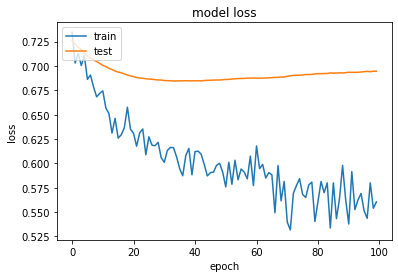

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

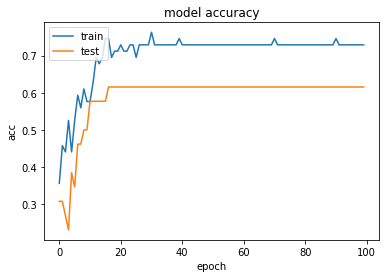

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Test Predict

In [17]:
predict = model.predict(X_test)
predict

array([[0.69644105],
       [0.6657493 ],
       [0.6831479 ],
       [0.66115797],
       [0.66390526],
       [0.61714774],
       [0.62376344],
       [0.6683291 ],
       [0.6927027 ],
       [0.6870633 ],
       [0.6771302 ],
       [0.6757572 ],
       [0.6843688 ],
       [0.6716369 ],
       [0.7017683 ],
       [0.65580153],
       [0.6832183 ],
       [0.6852952 ],
       [0.7055363 ],
       [0.6820952 ],
       [0.6565064 ],
       [0.6904452 ],
       [0.69689924],
       [0.65834165],
       [0.71504587],
       [0.6823333 ]], dtype=float32)

### Save model

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y[:26])
cm


array([[ 1,  5],
       [ 2, 18]])

In [ ]:

tf.saved_model.save(model, "fine_tuned")
model.save("model", include_optimizer=False) 

INFO:tensorflow:Assets written to: fine_tuned/assets


INFO:tensorflow:Assets written to: fine_tuned/assets


INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


In [ ]:
def importModel(modelPath):
    model = tf.keras.models.load_model(modelPath)
    tfjs.converters.save_keras_model(model, "tfjsmodel")


In [ ]:
!zip -r /content/model.zip /content/model
!zip -r /content/fine_tuned.zip /content/fine_tuned

updating: content/model/ (stored 0%)
updating: content/model/saved_model.pb (deflated 86%)
updating: content/model/assets/ (stored 0%)
updating: content/model/assets/tokens.txt (deflated 51%)
updating: content/model/variables/ (stored 0%)
updating: content/model/variables/variables.data-00000-of-00001 (deflated 7%)
updating: content/model/variables/variables.index (deflated 50%)
updating: content/model/keras_metadata.pb (deflated 82%)
updating: content/fine_tuned/ (stored 0%)
updating: content/fine_tuned/saved_model.pb (deflated 86%)
updating: content/fine_tuned/assets/ (stored 0%)
updating: content/fine_tuned/assets/tokens.txt (deflated 51%)
updating: content/fine_tuned/variables/ (stored 0%)
updating: content/fine_tuned/variables/variables.data-00000-of-00001 (deflated 7%)
updating: content/fine_tuned/variables/variables.index (deflated 52%)


In [ ]:
from google.colab import files
files.download('/content/fine_tuned.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('/content/model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Normal Tensorflow (without TFHub)

split buat train dan test + validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True)

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 700
trunc_type = 'post'
padding_type = 'post'
oov_token = '<OOV>'

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(x)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(X_train)
testing_sequences = tokenizer.texts_to_sequences(X_test)

training_padding = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
testing_padding = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

training_padding = np.array(training_padding)
training_labels = np.array(y_train)

testing_padding = np.array(testing_padding)
testing_labels = np.array(y_test)




In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='softmax'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 700, 16)           160000    
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_9 (Dense)             (None, 64)                1088      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                      

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

num_epochs = 50
history = model.fit(training_padding, training_labels, epochs=num_epochs, steps_per_epoch = 10, validation_data=(testing_padding, testing_labels), verbose=2)

Epoch 1/50
10/10 - 1s - loss: 0.6966 - accuracy: 0.4237 - val_loss: 0.6955 - val_accuracy: 0.2308 - 625ms/epoch - 63ms/step
Epoch 2/50
10/10 - 0s - loss: 0.6960 - accuracy: 0.3898 - val_loss: 0.6945 - val_accuracy: 0.2308 - 48ms/epoch - 5ms/step
Epoch 3/50
10/10 - 0s - loss: 0.6927 - accuracy: 0.5085 - val_loss: 0.6934 - val_accuracy: 0.2308 - 50ms/epoch - 5ms/step
Epoch 4/50
10/10 - 0s - loss: 0.6943 - accuracy: 0.4237 - val_loss: 0.6922 - val_accuracy: 0.7692 - 51ms/epoch - 5ms/step
Epoch 5/50
10/10 - 0s - loss: 0.6918 - accuracy: 0.6780 - val_loss: 0.6911 - val_accuracy: 0.7692 - 49ms/epoch - 5ms/step
Epoch 6/50
10/10 - 0s - loss: 0.6933 - accuracy: 0.5424 - val_loss: 0.6901 - val_accuracy: 0.7692 - 47ms/epoch - 5ms/step
Epoch 7/50
10/10 - 0s - loss: 0.6920 - accuracy: 0.5932 - val_loss: 0.6891 - val_accuracy: 0.7692 - 47ms/epoch - 5ms/step
Epoch 8/50
10/10 - 0s - loss: 0.6904 - accuracy: 0.6102 - val_loss: 0.6880 - val_accuracy: 0.7692 - 51ms/epoch - 5ms/step
Epoch 9/50
10/10 - 0s 